$$\Phi(x)=\frac{1}{2}+\frac{1}{2}\mathrm{erf}(x/\sqrt{2})$$

Levels:

- *Degenerate*
- *Binomial*
- *Normal*
- *Subexponential*: **all the moments are defined** but they do not satisfy Cramer condition (non insurability, technically the exp value of the exponential of the rv does not exist)

In [1]:
import scipy.stats as stat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Visualization.charting import generate_ax
from Visualization.aestethics import base

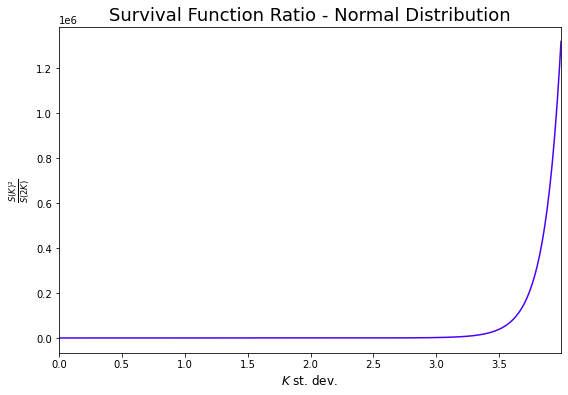

In [16]:
survival_ratio = {i: stat.norm.sf(i, 1)**2 / stat.norm.sf(2 * i, 1) for i in np.arange(0, 4, 0.01)}
ax = generate_ax('Survival Function Ratio - Normal Distribution', '$K$ st. dev.', r'$\frac{S(K)^2}{S(2K)}$')
pd.Series(survival_ratio).plot(ax=ax, color=base)
plt.show()

In [ ]:

survival_ratio = {i: stat.t.sf(i, 1)**2 / stat.t.sf(2 * i, 1) for i in np.arange(0, 4, 0.1)}

pd.Series(survival_ratio).plot(figsize=(9, 6))
plt.show()

In [ ]:
print(stat.t.sf(2, 2))

In [ ]:
pd.Series(survival_ratio).plot(figsize=(9, 6))
plt.show()